# Objective is to classify images in CIFAR10 dataset which contains 50k images of various things and there are a total of 10 classes to classify those images.
Major sources used to explain the theory are from, <br>
1.https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/<br>
2.https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

In [0]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output
from keras.utils import to_categorical # Helps to convert inputs to OneHot.

In [4]:
#Importing Dataset from keras
from keras.datasets import cifar10
#loading the Dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
#Checking the shapes of training sets
print("Shape of xtrain :",x_train.shape)
print("Shape of ytrain :",y_train.shape)

Shape of xtrain : (50000, 32, 32, 3)
Shape of ytrain : (50000, 1)


## Visualising the Data

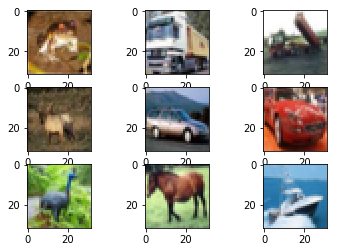

In [38]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

## Preparing the Tensorflow

In [0]:
tf.reset_default_graph()
x_ph = tf.placeholder(tf.float32, [None,32,32,3])
y_ph = tf.placeholder(tf.float32, [None,10])

f1 = tf.get_variable('f1',shape = [7,7,3,200],initializer = tf.contrib.layers.xavier_initializer())
f2 = tf.get_variable('f2',shape = [9,9,200,200],initializer = tf.contrib.layers.xavier_initializer())

# Now our goal is to make Convolution between Layers
### What are Convolutions why are they necessary?!
Just like any other operations such as Addition, subtraction,multiplication, division, there's a yet another operation called **Convolution**.(Denoted with *)<br>
Now this operation is performed on a filter and an image.<br>
Lets dig deeper and ask,<br> 
#### What's an image? What's a filter and What's that operation?
$ Image :$<br>
An image as we all know is a collection of pixels. A pixel is an intger value and collection of these values forms matrices and collection of these matrices forms an image.And this in a NutShell!<br>
So there are totally 3 things which are going to judge an image : <br>
$$ [imgHeight,imgWidth,numChannels]$$
Channels denotes the colour of the image ~ $ RGB $<br>
Take a look at the above image under "Visualing the data" section. You can see ImgHeight,ImgWidth as well as the colour of the image.<br>
$ Filter :$<br>
A filter is similar to an image but it has got a single matrix of values which also can be fractional and whose shape is odd.
<br> And now the final question, **How convolution happens?!**<br>
Let's try to break the question with help of an example..,
<br>Let's assume there's an image of size 6x6(For time being, let the channels be equal to 1),<br>
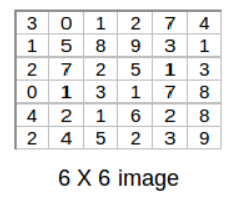<br>
And there's a filter of size 3x3 ,<br>
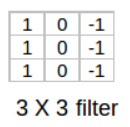<br>
Now let's Convolve these 2 pieces and see what happens,<br>
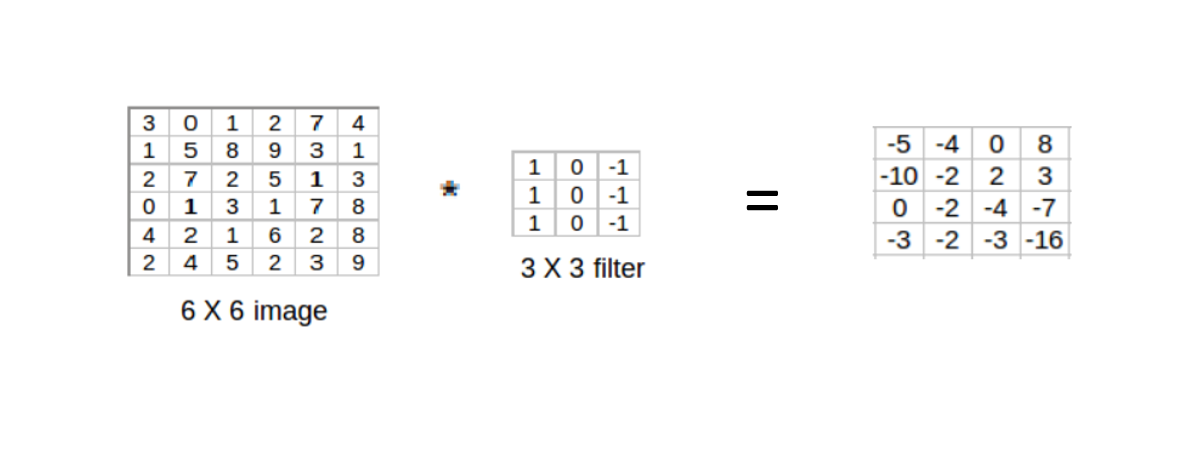<br>
## How Convolution happens? <br>
First, we take 3x3 matrix from 6x6 image and multiply it with filter.Now the first element of the 4x4 output will be the sum of element-wise product of these values, (i.e)<br>  
### 3\*1 + 0 + 1\*-1 + 1\*1 + 5\*0 + 8\*-1 + 2\*1 + 7\*0 + 2\*-1 = -5 .(Below image illustrates this)<br>
<img src = "convolution.png"><br>

### So, convolving a 6x6 image with a 3x3 filter gave us an output of 4x4.Hence we can deduce a formula to get the output such that,

1.   **Input** : nxn
2.   **Filter size** : fxf
3.   **Output** : (n-f+1)x(n-f+1)<br>

There are 2 disadvantages here :

1.   Every time we apply a convolutional operation, the size of the image shrinks.
2.   Pixels present in the corner of the image are used only a few number of times during convolution as compared to the central pixels. Hence, we do not focus too much on the corners since that can lead to information loss

### To overcome these issues, we can pad the image with an additional border, i.e., we add one pixel all around the edges. This means that the input will be an 8 X 8 matrix (instead of a 6 X 6 matrix).

1.   **Input** : nxn
2.   **Filter size** : fxf
3.   **Padding**: p
4.   **Output** : (n+2p-f+1)x(n+2p-f+1)<br>
<img src = "Padding.gif"><br>

There are 2 common choices for padding :
1. **Valid**: It means no padding. If we are using valid padding, the output will be (n-f+1) X (n-f+1).
2. **Same** : Here, we apply padding so that the output size is the same as the input size, i.e.,<br>
n+2p-f+1 = n<br>
So, p = (f-1)/2<br>

We now know how to use padded convolution. This way we don’t lose a lot of information and the image does not shrink either. Next, we will look at how to implement strided convolutions.<br>
### Strided Convolutions :<br>
Suppose we choose a stride of 2. So, while convoluting through the image, we will take two steps – both in the horizontal and vertical directions separately. The dimensions for stride s will be: <br>
1.   **Input** : nxn
2.   **Filter size** : fxf
3. **Stride**: s
4.   **Padding**: p
5.   **Output** :  [(n+2p-f)/s+1] X [(n+2p-f)/s+1] <br>
Stride helps to reduce the size of the image, a particularly useful feature.<br>

## In a convolutional network, there are basically 3 types of layers :


1.   Convolution layer
2.   Pooling layer
3. Fully connected layer
<br> We all know what are **convolution layer and Fully connected layers**. So lets see what's a Pooling layer,<br>
### Pooling Layer :
Pooling layers are generaaly used to reduce the size of the inputs and hence speed up the computation. Consider a 4x4 matrix as shown below,<br>
<img src = "6x6_image.PNG"><br>
Applying max pooling on this matrix will result in a 2x2 output :<br>
<img src = "max_pool.PNG"><br>
For every consecutive 2 X 2 block, we take the max number. Here, we have applied a filter of size 2 and a stride of 2. These are the hyperparameters for the pooling layer. Apart from max pooling, we can also apply average pooling where, instead of taking the max of the numbers, we take their average. In summary, the hyperparameters for a pooling layer are:


1.   Filter size
2.   Stride
3. Max or average pooling<br>
<img src = "CNN.PNG"><br>

Source :  https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/






## Why Relu layer?
After each conv layer, it is convention to apply a non linear layer(activation layer) immediately afterward. The purpose of this layer is to introduce non linearity to a system that basically has just been computing linear operations during the conv layers(just element wise multiplications and summations). We can use tanh or sigmoid but over the years researchers found out that **Relu** layers work far better because the network is able to train a lot faster.
** This layer basically changes all the negative activations to 0**. This layer increases the non-linear properties of the model and overall network without affecting the receptive fields of the conv layer.<br>
Simply,


1.   In this layer, we remove all the negative values from the filtered images and replace it with zeros.
2.   This is done to avoid values from summing to zero.<br>

Source : https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/



### CNNs are recommended to run on GPUs as it needs high computation and is slow on local PCs.

In [10]:
# Checking the gpu if enabled
tf.test.gpu_device_name()

'/device:GPU:0'

In [56]:
################ RUNNING TENSORFLOW IN GPU ##################
############## cv denotes convolution #############
with tf.device('/device:GPU:0'):
      cv1 = tf.nn.conv2d(x_ph, f1, strides = [1,1,1,1], padding = 'SAME')  #### SAME PADDING RETURNS THE SAME AMT. OF PIXELS LOST DURING CONVOLUTION(border pixels)
      l1out = tf.nn.relu(cv1)  #WE USE RELU B/C TANH OR SIGMOID OR ANY ACT. FN TAKES THE IMAGES INTO A DIFFERENT SHAPE.
      l1out = tf.nn.max_pool(l1out, ksize =[1,2,2,1], padding = 'SAME', strides = [1,2,2,1])
      
      cv2 = tf.nn.conv2d(l1out,f2,strides = [1,1,1,1], padding = 'SAME' )
      l2out = tf.nn.relu(cv2)
      l2out = tf.nn.max_pool(l2out, ksize = [1,2,2,1], padding = 'SAME', strides = [1,2,2,1])


      ### https://keras.io/layers/core/
      flat_0 = tf.contrib.layers.flatten(l2out)   # Flattening 
      flat_1 = tf.layers.dense(flat_0,256,activation = 'relu',kernel_initializer='glorot_uniform')  #Glorot normal initializer, also called Xavier normal initializer.
      classifier = tf.layers.dense(flat_1,10,activation = tf.nn.softmax,kernel_initializer='glorot_uniform')  #Glorot normal initializer, also called Xavier normal initializer.

      ''' Remember, while initialising tf.layers.dense, the kernel_initialiser if written or not written, it automatically initialises its own weights
                from Xavier's normal initialiser and applies to its layer. '''

      #cost = tf.reduce_mean(tf.square(tf.nn.sigmoid(classifier)-Y_PH))
      cost = tf.reduce_mean(tf.square(tf.nn.sigmoid(classifier)-y_ph))
      minimizer = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)

print('Shape of features =',x_train.shape)
print('Shape of cv1 =',cv1.shape)
print('Shape of l1out =',l1out.shape)
print('Shape of cv2 =',cv2.shape)
print('Shape of l2out =',l2out.shape)
print('flat_0 Shape:',flat_0.shape)
print("flat_1 Shape:",flat_1.shape)
print("Final Shape:",classifier.shape)

Shape of features = (50000, 32, 32, 3)
Shape of cv1 = (?, 32, 32, 200)
Shape of l1out = (?, 16, 16, 200)
Shape of cv2 = (?, 16, 16, 200)
Shape of l2out = (?, 8, 8, 200)
flat_0 Shape: (?, 12800)
flat_1 Shape: (?, 256)
Final Shape: (?, 10)


In [0]:
def batch(X,Y,size):
  random_indices = np.random.randint(np.size(Y[:,0]),size = (size,1))
  x_batch = X[random_indices]
  x_batch = x_batch.reshape(size,32,32,3)
  y_batch = Y[random_indices]
  y_batch = y_batch.reshape(size, 10)

  return x_batch,y_batch

In [57]:
S = tf.Session(config = tf.ConfigProto(log_device_placement = True))
init = tf.global_variables_initializer()
S.run(init)

loss = []

for i in range(100):
  XBatch,YBatch = batch(x_train, to_categorical(y_train, num_classes = 10),size = 1000)
  fd = {x_ph:XBatch,y_ph:YBatch}
  S.run(minimizer,feed_dict = fd)
  clear_output(True) 
  print("Iter: ",i, "Cost: ",S.run(cost,feed_dict = fd))
  loss.append(S.run(cost,feed_dict = fd))

Iter:  99 Cost:  0.2735


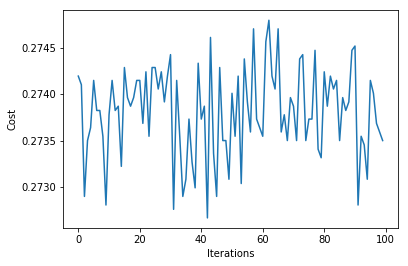

In [58]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# <ins>**Conclusion**</ins> : We have seen the architecture of CNN by classifying cifar10 dataset. We can still improve the results by adding bias and regularising using Dropouts and can also visualize the results. These things will covered in future soon.!